In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RNN import RNN

%matplotlib inline

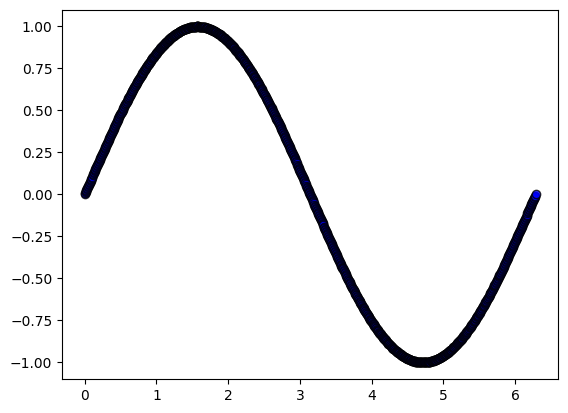

In [2]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x) 

plt.scatter(x, y, c='blue', 
            edgecolor='black', alpha=0.8)
plt.show()

In [3]:
length_sequence = 10
inputs, targets = [], []

for i in range(len(x)):
    try:
        row = y[i: i + length_sequence]
        target = y[i + length_sequence]
    except:
        continue
        
    inputs.append(row.reshape(1, -1))
    targets.append(target.reshape(1, -1))
    
inputs = np.array(inputs)
targets = np.array(targets)

In [4]:
input_units = length_sequence
output_units = 1
hidden_units = 8
learning_rate = 0.005

lstm = RNN(input_units=input_units, output_units=output_units, 
           lr=learning_rate, hidden_units=hidden_units, 
           dtype='many-to-one', regression=True)

In [5]:
epochs = 100
cost = []

for epoch in range(epochs):
    
    loss = 0
    
    for input_t, target_t in zip(inputs, targets):
        loss_t, predictions, outputs, hidden_outputs, hidden_states = lstm.forward(input_t, target_t)
        
        lstm.backward(input_t, target_t, predictions, outputs, hidden_outputs, hidden_states)
        lstm.update_weigths()
        
        loss += loss_t
        
    if not (epoch + 1) % 10: print(loss)
        
    cost.append(loss)

17.108063285347946
5.454086392283728
2.731448024438496
1.6570993734879733
1.1246343283666933
0.8304021336645159
0.6591228180290164
0.557597782728543
0.49816900924943075
0.4651869694682441


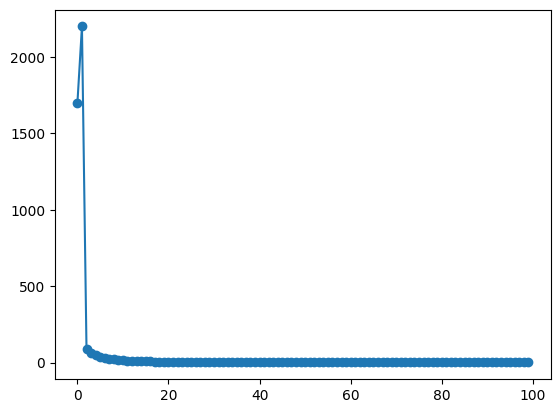

In [6]:
plt.plot(cost, '-o')

In [7]:
predictions = []

for x_t in inputs:
    prediction = lstm.predict([x_t])
    predictions.append(prediction)
    
print(predictions[:4])

[array([[0.03336642]]), array([[0.03982487]]), array([[0.04629518]]), array([[0.05277711]])]


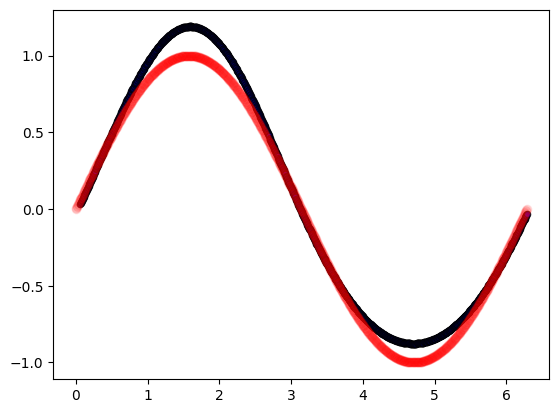

In [8]:
for i, prediction in enumerate(predictions):
    slice_x = x[i + length_sequence]
    plt.scatter(slice_x, prediction, 
                c='blue', alpha=.8, s=20, 
                edgecolor='black')
    
plt.scatter(x, y, c='red', alpha=0.1)
plt.show()